In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

Meminta data dari Nasa.Larc API

In [5]:
parameter = {
    'start' : '20230701',
    'end' : '20240701',
    'latitude' : '-6.9',
    'longitude' : '107.62',
    'community' : 're',
    'parameters' : 'T2M,QV2M,PS,ALLSKY_SFC_SW_DWN',
    'format' : 'json',
    'header' : 'true',
    'time-standard' : 'lst'
}

respond = requests.get('https://power.larc.nasa.gov/api/temporal/hourly/point?',params=parameter)
data = respond.json()
df = pd.DataFrame(data['properties']['parameter'])
df = df.reset_index()
df

,index,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN
0,2023070100,19.10,14.91,91.06,0.0
1,2023070101,18.81,14.66,91.00,0.0
2,2023070102,18.60,14.45,90.96,0.0
3,2023070103,18.41,14.29,90.95,0.0
4,2023070104,18.21,14.10,90.96,0.0
...,...,...,...,...,...
8803,2024070119,21.45,17.21,90.96,0.0
8804,2024070120,21.20,17.03,90.99,0.0
8805,2024070121,20.96,16.83,90.99,0.0
8806,2024070122,20.74,16.64,90.98,0.0


Merubah nama colomn index menjadi time

In [ ]:
df.rename(columns={"index": "time"},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               8808 non-null   object 
 1   T2M                8808 non-null   float64
 2   QV2M               8808 non-null   float64
 3   PS                 8808 non-null   float64
 4   ALLSKY_SFC_SW_DWN  8808 non-null   float64
dtypes: float64(4), object(1)
memory usage: 344.2+ KB


In [ ]:
df.describe()

,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN,datetime
count,8808.000000,8808.000000,8808.000000,8808.000000,8808
mean,22.281277,15.994933,91.001185,216.337876,2023-12-31 11:30:00
min,14.170000,10.860000,90.550000,-999.000000,2023-07-01 00:00:00
25%,20.150000,14.950000,90.890000,0.000000,2023-09-30 17:45:00
50%,21.800000,16.220000,91.000000,12.865000,2023-12-31 11:30:00
75%,24.760000,17.190000,91.110000,445.635000,2024-04-01 05:15:00
max,30.170000,19.570000,91.500000,1024.150000,2024-07-01 23:00:00
std,3.034562,1.597933,0.150883,291.184287,NaN


Melihat nilai -999 pada ALLSKY_SFC_SW_DWN

In [ ]:
df[df.ALLSKY_SFC_SW_DWN == -999]

,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN,datetime
4776,2024011600,20.72,16.53,90.80,-999.0,2024-01-16 00:00:00
4777,2024011601,20.51,16.30,90.74,-999.0,2024-01-16 01:00:00
4778,2024011602,20.25,16.03,90.72,-999.0,2024-01-16 02:00:00
4779,2024011603,19.96,15.75,90.72,-999.0,2024-01-16 03:00:00
4780,2024011604,19.63,15.46,90.75,-999.0,2024-01-16 04:00:00
4781,2024011605,19.39,15.24,90.78,-999.0,2024-01-16 05:00:00
4782,2024011606,20.48,15.74,90.85,-999.0,2024-01-16 06:00:00


Merubah nilai -999 ke 0 karena waktu menunjukkan pada pukul 00:00 sampai 06:00 matahari belum terbit

In [ ]:
df.replace(-999.0 ,0.0 , inplace=True)

In [ ]:
df[df.ALLSKY_SFC_SW_DWN == -999]

,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN,datetime


Menambahkan column datetime

In [ ]:
df['datetime'] = pd.to_datetime(df['time'], format='%Y%m%d%H')
df

,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN,datetime
0,2023070100,19.10,14.91,91.06,0.0,2023-07-01 00:00:00
1,2023070101,18.81,14.66,91.00,0.0,2023-07-01 01:00:00
2,2023070102,18.60,14.45,90.96,0.0,2023-07-01 02:00:00
3,2023070103,18.41,14.29,90.95,0.0,2023-07-01 03:00:00
4,2023070104,18.21,14.10,90.96,0.0,2023-07-01 04:00:00
...,...,...,...,...,...,...
8803,2024070119,21.45,17.21,90.96,0.0,2024-07-01 19:00:00
8804,2024070120,21.20,17.03,90.99,0.0,2024-07-01 20:00:00
8805,2024070121,20.96,16.83,90.99,0.0,2024-07-01 21:00:00
8806,2024070122,20.74,16.64,90.98,0.0,2024-07-01 22:00:00


Membuat dataframe baru dengan datetime dan ALLSKY_SFC_SW_DWN

In [ ]:
new_df = df[['datetime','ALLSKY_SFC_SW_DWN']]
new_df = new_df.set_index('datetime')
new_df

,ALLSKY_SFC_SW_DWN
datetime,
2023-07-01 00:00:00,0.0
2023-07-01 01:00:00,0.0
2023-07-01 02:00:00,0.0
2023-07-01 03:00:00,0.0
2023-07-01 04:00:00,0.0
...,...
2024-07-01 19:00:00,0.0
2024-07-01 20:00:00,0.0
2024-07-01 21:00:00,0.0


Membuat plot pada ALLSKY_SFC_SW_DWN

<Axes: xlabel='datetime'>

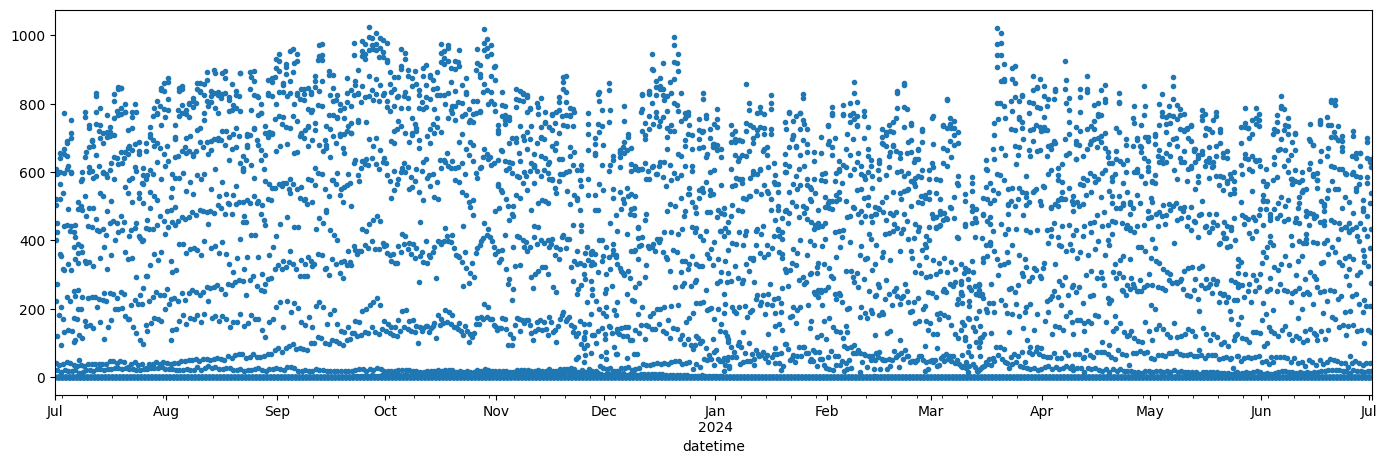

In [ ]:
new_df['ALLSKY_SFC_SW_DWN'].plot(style='.', figsize=(17,5))

Membagi data menjadi 2 : train dan test

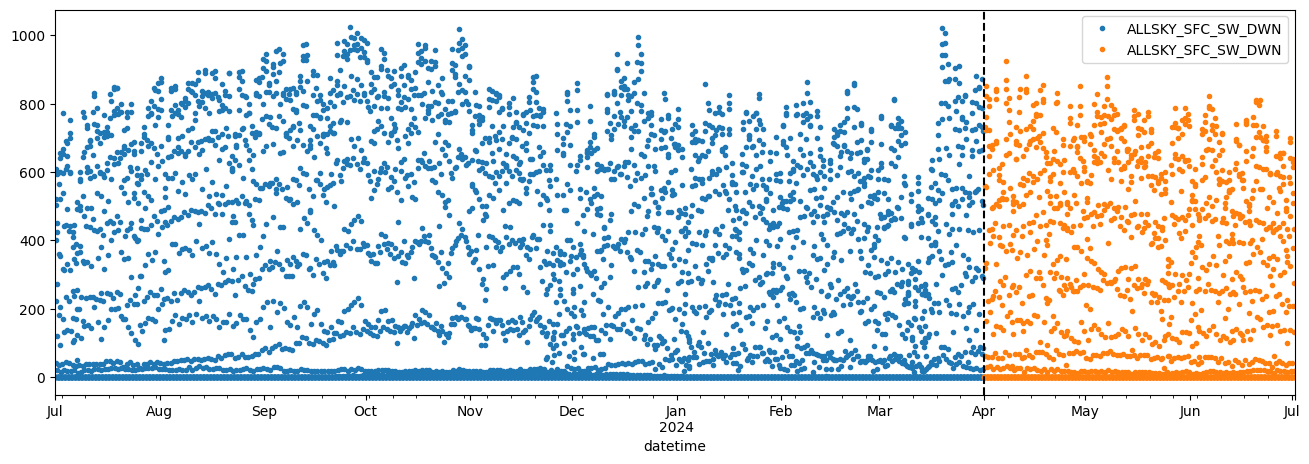

In [ ]:
train = new_df.loc[new_df.index < '04-01-2024']
test = new_df.loc[new_df.index >= '04-01-2024']

fig, ax = plt.subplots(figsize=(16,5))
train.plot(ax=ax , label='train',style='.')
test.plot(ax=ax, label='test',style='.')
ax.axvline('04-01-2024',color='black',ls='--')
plt.show()

Membuat plot dengan kurun waktu 1 minggu

<Axes: xlabel='datetime'>

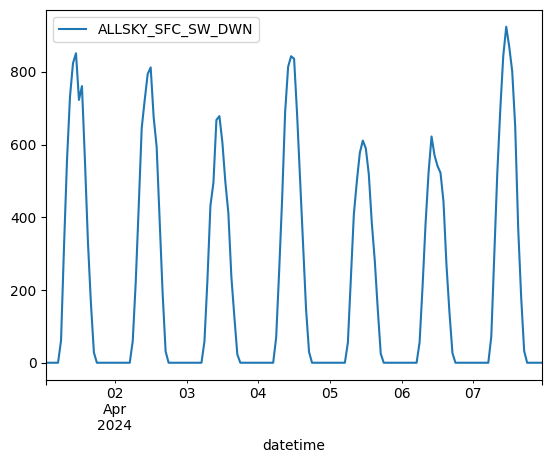

In [ ]:
new_df.loc[(new_df.index > '04-01-2024') & (new_df.index < '04-08-2024')].plot()


Membuat column baru dengan fitur hour,dayofweek,quarter,month,year, dan dayoftheyear

In [ ]:

def create_features(df):
  df['hour'] = df.index.hour
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  return df

In [ ]:
data_df = create_features(new_df)
data_df

,ALLSKY_SFC_SW_DWN,hour,dayofweek,quarter,month,year,dayofyear
datetime,,,,,,,
2023-07-01 00:00:00,0.0,0,5,3,7,2023,182
2023-07-01 01:00:00,0.0,1,5,3,7,2023,182
2023-07-01 02:00:00,0.0,2,5,3,7,2023,182
2023-07-01 03:00:00,0.0,3,5,3,7,2023,182
2023-07-01 04:00:00,0.0,4,5,3,7,2023,182
...,...,...,...,...,...,...,...
2024-07-01 19:00:00,0.0,19,0,3,7,2024,183
2024-07-01 20:00:00,0.0,20,0,3,7,2024,183
2024-07-01 21:00:00,0.0,21,0,3,7,2024,183


Membuat plot dengan X adalah column dan y adalah ALLSKY_SFC_SW_DWN

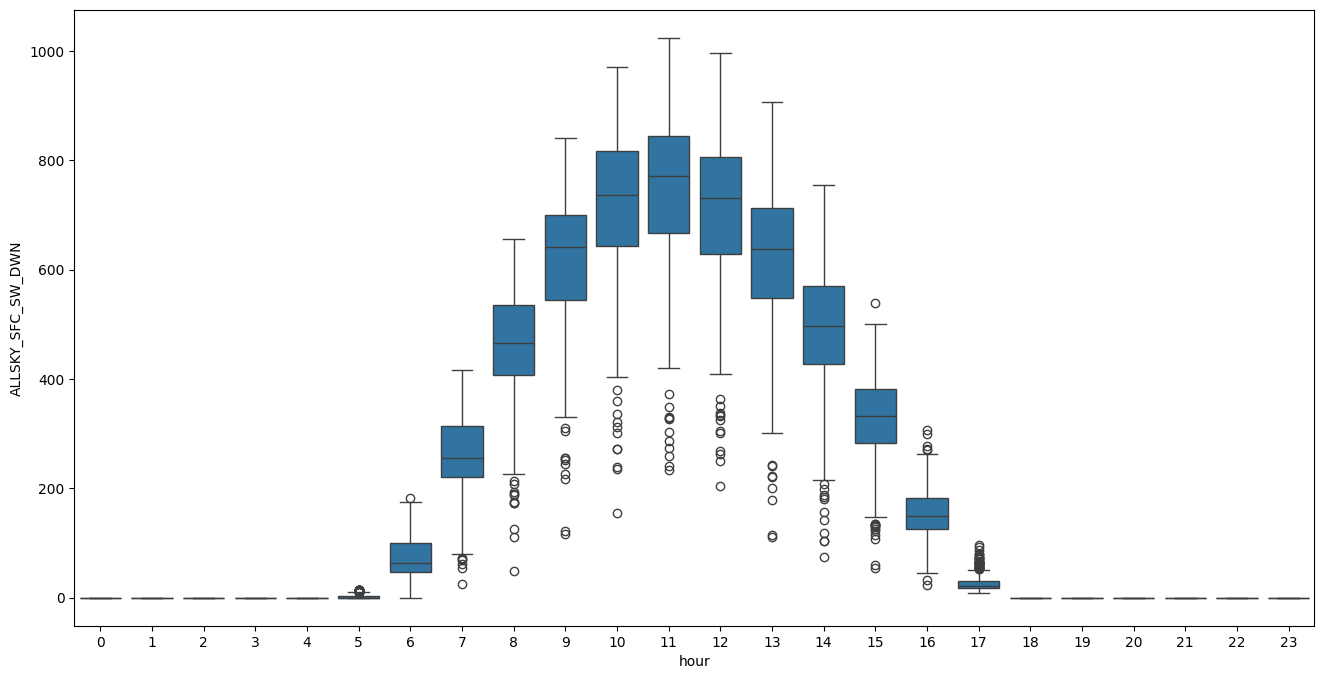

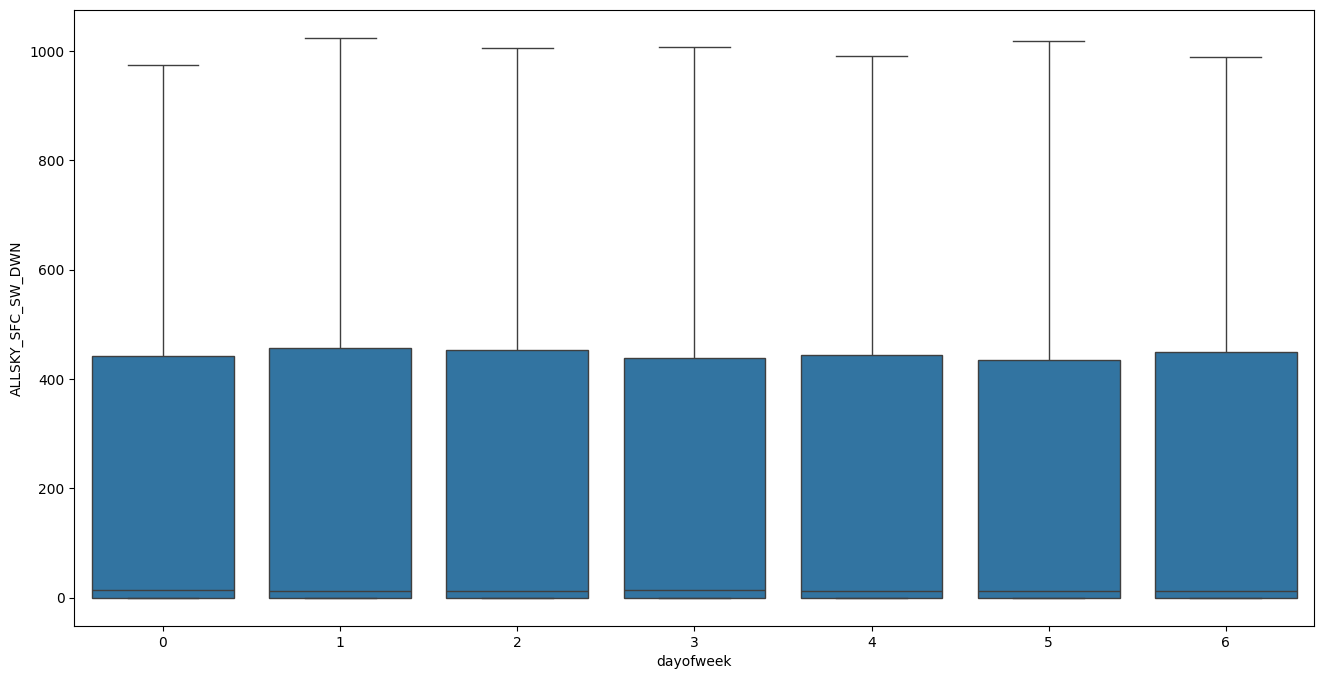

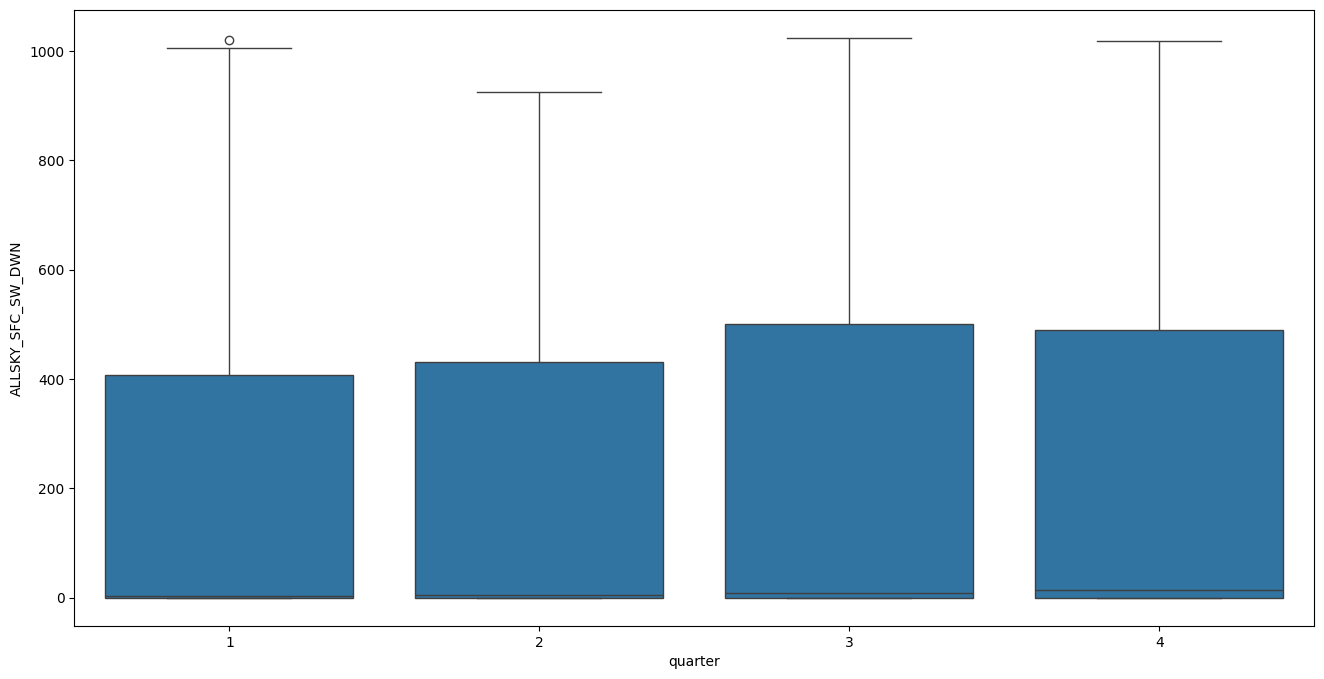

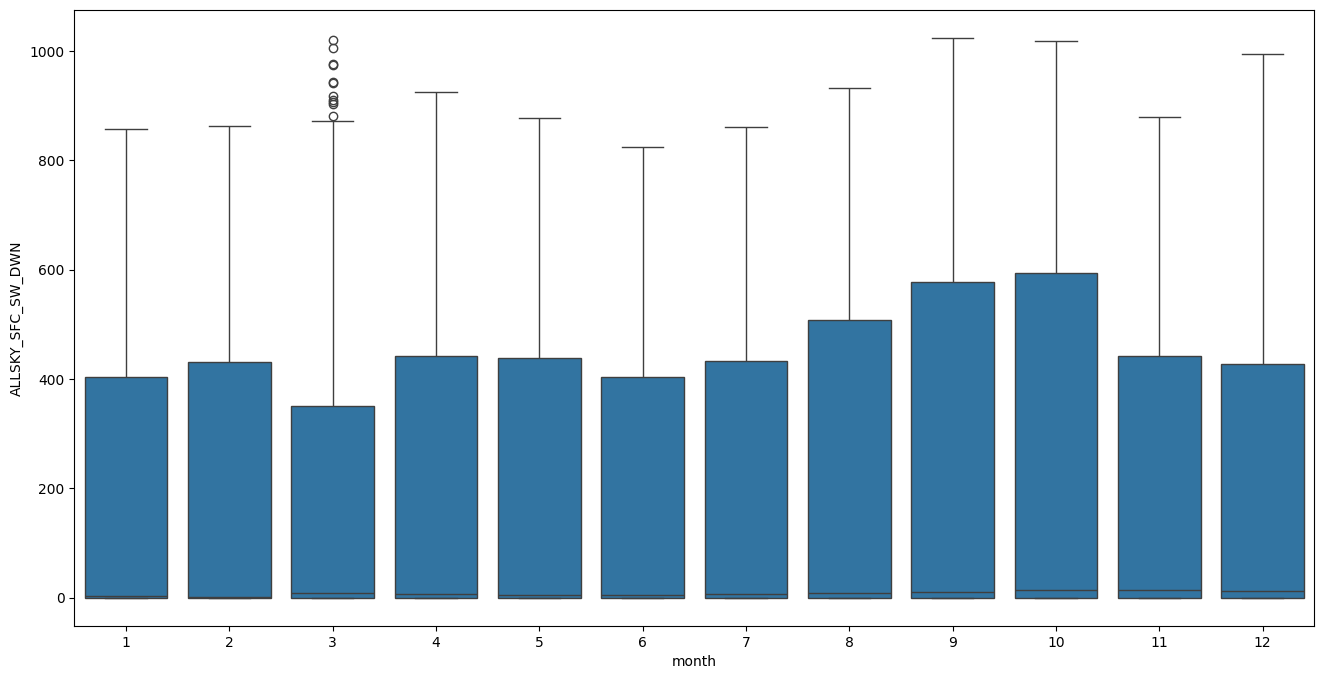

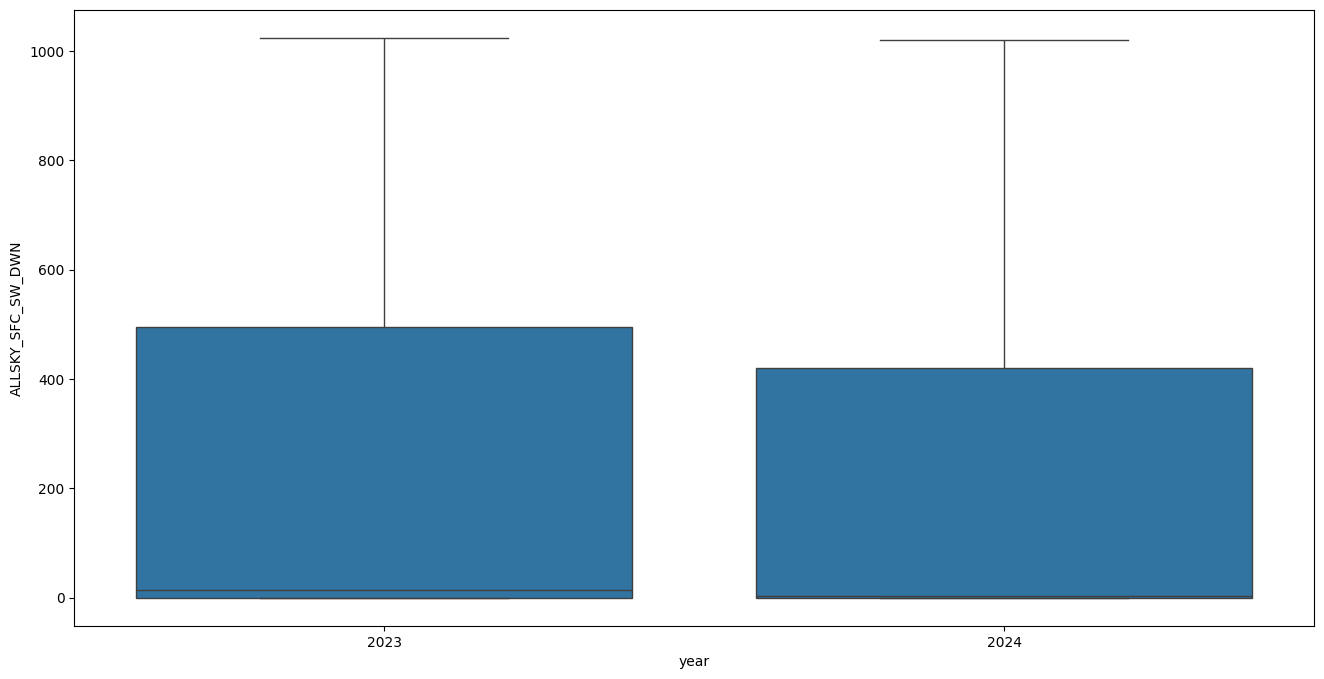

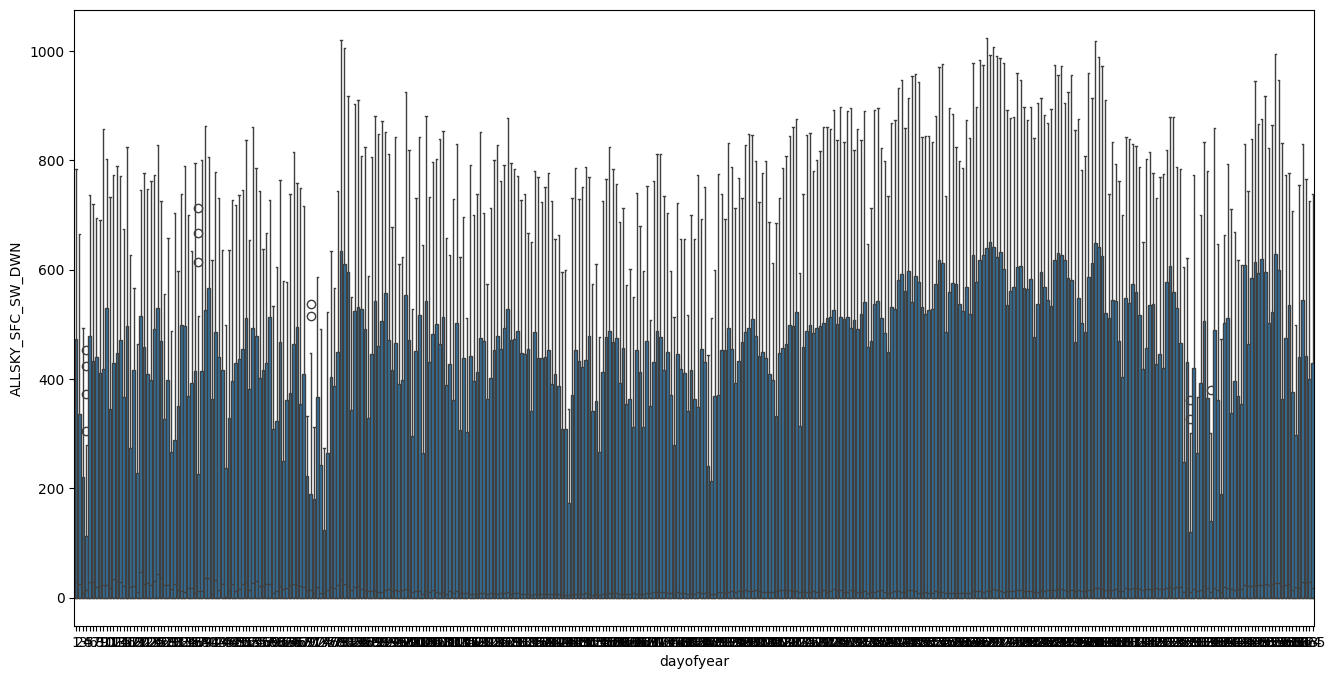

In [ ]:
column = ['hour','dayofweek','quarter','month','year','dayofyear']
for i in column:
  fig, ax = plt.subplots(figsize=(16,8))
  sns.boxplot(data=data_df, x =i,y='ALLSKY_SFC_SW_DWN')
  plt.show()

In [ ]:
train = create_features(train)
test = create_features(test)

<ipython-input-33-5bc71aade866>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
<ipython-input-33-5bc71aade866>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
<ipython-input-33-5bc71aade866>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

Membuat Features dan Target untuk machine learning

In [ ]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year','dayofyear']
TARGET = 'ALLSKY_SFC_SW_DWN'

x_train = train[FEATURES]
y_train = train[TARGET]

x_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Melakuakn predict dengan data x_test

In [ ]:
y_pred = rf_regressor.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Melihat nilai error dengan menggunakan MSE dan R2

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 3806.7440081155332
R-squared: 0.9467241299071731


Menggabungkan nilai prediksi dengan DataFrame utama

In [ ]:
test['prediction'] = y_pred
last_df = data_df.merge(test['prediction'], how='left', left_index=True, right_index=True)
last_df

<ipython-input-45-614af9df26df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = y_pred


,ALLSKY_SFC_SW_DWN,hour,dayofweek,quarter,month,year,dayofyear,prediction
datetime,,,,,,,,
2023-07-01 00:00:00,0.0,0,5,3,7,2023,182,NaN
2023-07-01 01:00:00,0.0,1,5,3,7,2023,182,NaN
2023-07-01 02:00:00,0.0,2,5,3,7,2023,182,NaN
2023-07-01 03:00:00,0.0,3,5,3,7,2023,182,NaN
2023-07-01 04:00:00,0.0,4,5,3,7,2023,182,NaN
...,...,...,...,...,...,...,...,...
2024-07-01 19:00:00,0.0,19,0,3,7,2024,183,0.0
2024-07-01 20:00:00,0.0,20,0,3,7,2024,183,0.0
2024-07-01 21:00:00,0.0,21,0,3,7,2024,183,0.0


Plot dengan dengan menggunakan data prediksi dan data utama

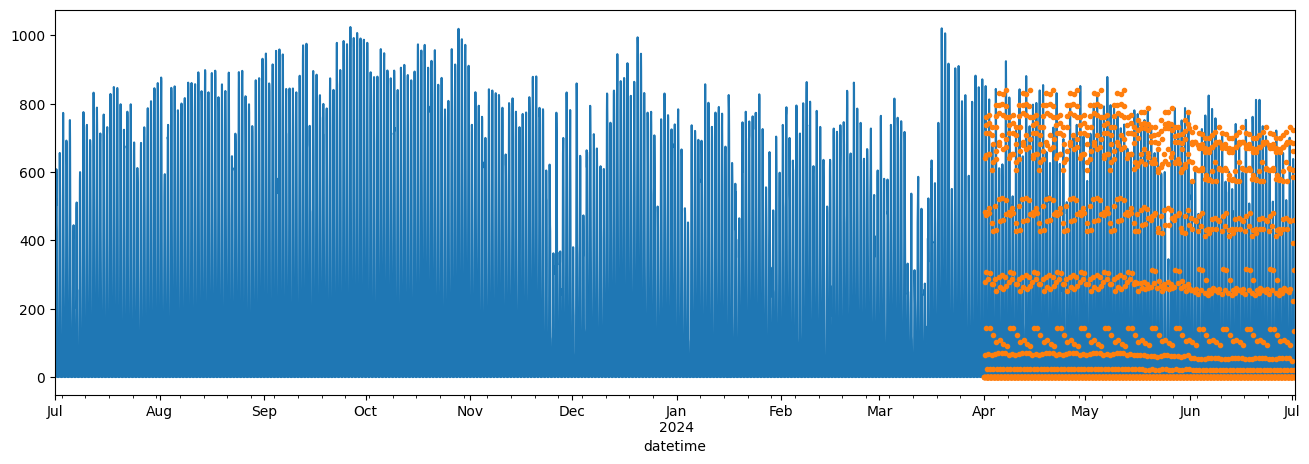

In [ ]:
ax = last_df['ALLSKY_SFC_SW_DWN'].plot(figsize=(16,5))
last_df['prediction'].plot(ax=ax, style='.')
plt.show()

Melihat perbandingan data prediksi dengan data utama pada kurun waktu satu minggu

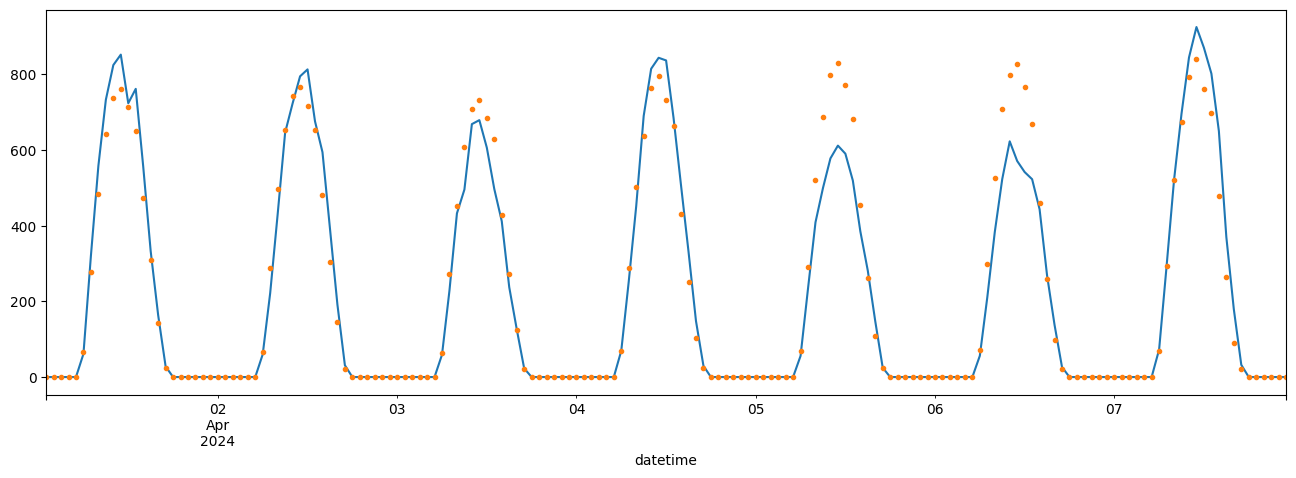

In [ ]:
ax = last_df.loc[(last_df.index > '04-01-2024') & (last_df.index < '04-08-2024')]['ALLSKY_SFC_SW_DWN'].plot(figsize=(16,5))
last_df.loc[(last_df.index > '04-01-2024') & (last_df.index < '04-08-2024')]['prediction'].plot(ax=ax, style='.')
plt.show()

import library untuk menyimpan model

In [ ]:
import pickle
import joblib

In [ ]:
joblib.dump(rf_regressor, 'model_jlib')


['model_jlib']

In [ ]:
test = joblib.load('model_jlib')
y_pred = test.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 3806.7440081155332
R-squared: 0.9467241299071731


In [ ]:
# !pip freeze > requirements.txt
# !pip list --format=freeze > requirements.txt